# Implementación del algoritmo de Gradiente Descendente.

Este informe técnico tiene como objetivo presentar una implementación del algoritmo de Gradiente Descendente en dos y tres dimensiones para su aplicación en la minimización de funciones costo en Machine Learning.

## Introducción:
El algoritmo de Gradiente Descendente es un método de optimización utilizado para encontrar el mínimo de una función. El algoritmo se basa en la actualización iterativa de los parámetros de la función mediante el cálculo del gradiente de la función en cada punto.  
Ya sabemos que el gradiente de una función nos dice hacia qué dirección está el ascenso más pronunciado, de manera análoga el negativo de este gradiente nos dice en qué direccion estpa el desccenso más pronunciado. Podemos utilizar esta información para encontrar el minimo local de una funcion con movimientos pequeños en la direccion contraria al gradiente en cada punto.  
En este informe, presentaremos la implementación de este algoritmo en dos y tres dimensiones para dos funciones de ejemplo.

## Implementación:
Para implementar el algoritmo de Gradiente Descendente, se siguen los siguientes pasos:

### 1) Definir las funciones a minimizar:


en nuestro caso utilizaremos la función de rosenbrock (https://www.sfu.ca/~ssurjano/rosen.html), y la función "Three Hump Camel" (https://www.sfu.ca/~ssurjano/camel3.html).  
Para ambas funciones implementaremos el algoritmo de gradiente descendente en dos y tres dimensiones.  

#### Rosenbrock:

$$ f(X) = \sum_{i=1}^{d-1}[100(x_{i+1}-x_i^2)^2+(x_i-1)^2] $$

Sabemos que esta función tiene un minimo local en el punto $(1,1,1)$, este será el minimo local que intentaremos encontrar.  
Su implementación en python queda así: 

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from matplotlib import animation, rc
from IPython.display import HTML

def rosenbrock(X):
  result = 0
  for i in range(len(X)-1):
    result += 100*(X[i+1]-X[i]**2)**2+(X[i]-1)**2
  return result

#### Three Hump Camel:
$$ g(x,y) = 2x^{2}-1.05x^{2}+\frac{x^{6}}{6}+xy+y^{2}$$
Esta función tiene un minimo local en el punto $(0,0)$.  
Ahora, fijando uno de sus ejes para definir la función en dos dimensiones  nos queda:  
$$g(x,0)=2x^2-1.05x^2+\frac{x^6}{6}$$
$$g(x)=2x^2-1.05x^2+\frac{x^6}{6}$$  
Esta función solo está definida para 2 variables de entradas, por cuestiones de tiempo, se implementara el gradiente por descenso para una y dos variables de entrada en esta función.
Su implementación en python queda así:

In [ ]:
def three_hump_camel(X):
  x, y = X
  return 2*x**2-1.05*x**2+(x**6)/6+x*y+y**2

Ahora debemos definir el gradiente de cada función para poder calcular su valor en cada punto  $(x,y)$:  
$$\nabla f(X) = \begin{cases} -400 x_i \left( x_{i+1} -x_1^2 \right) + 2 ( x_i - 1) & \text{si } i=1 \\\\  -400 x_i \left( x_{i+1} - x_i^2 \right) + 2 (x_i - 1) + 200 \left( x_i - x_{i-1}^2 \right) & \text{si } 1 < i < n \\\\ 200 \left( x_i - x_{i-1}^2 \right) & \text{si } i=n \end{cases}$$  
$$\nabla g(x,y) = \begin{pmatrix}x^5-4.2x^3+4x+y\\ x+2y\end{pmatrix}$$  
En python:

In [ ]:
def grad_rosenbrock(X):
    first = -400*X[0]*(X[1]-X[0]**2)+2*(X[0]-1)
    result = [first]
    last = 200*(X[-1]-X[-2]**2)
    for i in range(1, len(X)-1):
        calc = -400*X[i]*(X[i+1]-X[i]**2)+2*(X[i]-1)+200*(X[i]-X[i-1]**2)
        result.append(calc)
    result.append(last)
    return np.array(result)


  
def grad_three_hump_camel(X):
  x, y = X
  return np.array([
      x**5 - 4.2*x**3 + 4*x + y,
      x + 2*y
      ])

### 2) Implementar el algoritmo de Gradiente Descendiente.  
El gradiente descendiente consiste en moverse en dirección con el descenso más pronunciado, si tenemos el gradiente ya tenemos la dirección de con el ascenso más pronunciado lo que significa que el negativo del gradiente es la dirección en la que debemos movernos, esto matemáticamente es:
$$x_{k+1}=x_k - \alpha*\nabla f(x_k)$$
En resumen:  
Inicializamos los valores para $x$.  
Calculamos el gradiente: $\nabla f(x)$.  
nos movemos una pequeña cantidad en dirección contraria al gradiente: $x - \alpha\nabla f(x)$.   
Repetimos hasta cumplir algún criterio de parada. Estos criterios pueden ser un numero máximo de iteraciónes o un umbral de error.  
Ahora veamos el equivalente en python:

In [ ]:
def gradient_descent(grad_f, x_init, learn_rate, max_iterations):
  x = x_init
  hist=[x_init]
  for i in range(max_iterations):
        gradient = grad_f(x)
        x = x - learn_rate * grad_f(x)
        hist.append(x)
        if np.linalg.norm(grad_f(x)) < 1e-2:
            return hist, x
  return hist, x

### 3) Minimizar las funciones en 3 y 4 dimensiones.

#### Rosenbrock en 3 dimensiones  
Primero que todo visualizemos la función en 3 dimensiones.

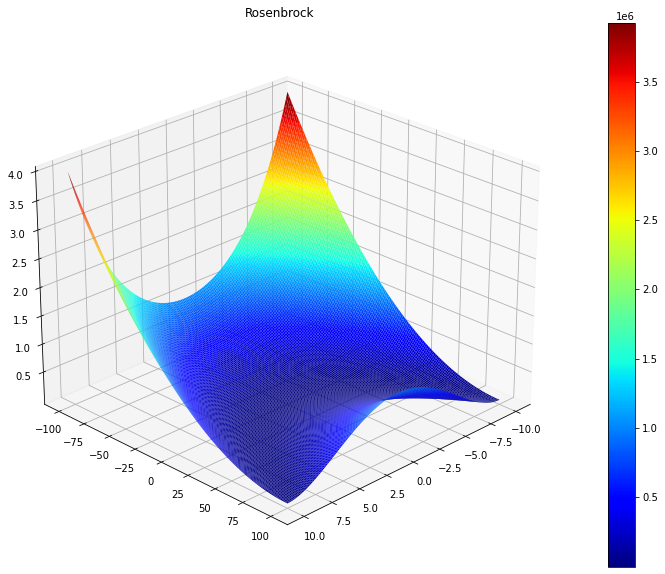

In [ ]:
x = np.linspace(-10, 10, 150)
y = np.linspace(-100, 100, 150)
X, Y = np.meshgrid(x, y)
Z = rosenbrock((X, Y))
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')
ax.set_title('Rosenbrock')
ax.view_init(elev=25., azim=45.)
s = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')
fig.colorbar(s)
plt.show()

Procedemos a minimizar la función:

In [ ]:
x_init = np.array([
    round(random.random()*4, 2),
    round(random.random()*4, 2)
    ]) # Generamos un X inicial aleatorio.
hist3d_ros, x_min = gradient_descent(grad_rosenbrock, x_init, 0.0001, 100000) # Minimizamos la función
print('X inicial:', x_init)
print('X óptimo:', x_min)
print('iteraciónes: ', len(hist3d_ros)-1)

X inicial: [2.94 1.06]
X óptimo: [1.01128119 1.02273447]
iteraciónes:  81707


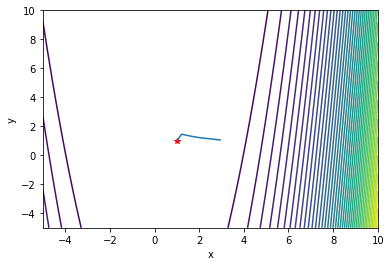

In [ ]:
ncols = 150
nrows = 150
X = np.linspace(-5, 10, ncols)
Y = np.linspace(-5, 10, nrows)
X, Y = np.meshgrid(X, Y)
Z = rosenbrock((X, Y))
Z = np.array(Z).reshape([nrows,ncols])
fig, ax = plt.subplots()
ax.contour(X, Y, Z, levels = 50)
ax.plot(1,1,"r*")
ax.plot([i[0] for i in hist3d_ros], [i[1] for i in hist3d_ros])
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

Podemos ver que se tomaron demasiadas iteraciónes para acercarce al minimo local, al estar minimizando una función concava, debemos escoger un alfa muy pequeño para movernos en pequeñas cantidades y evitar el riesgo de divergencia en la función.  
Para contrarrestar este efecto, construiremos una función helper, que nos calcula un alfa distinto en cada iteración, este alfa nos garantiza que en cada iteración no nos movamos más de 0.1 unidades, por lo tanto evitamos el riesgo de divergencia.  

In [ ]:
def iterative_alpha(grad, x):
    alpha = 1
    res = alpha * grad(x)
    while np.linalg.norm(res>0.1):
        alpha /= 10
        res = alpha * grad(x)
    if alpha > 1e-3:
        return 0.001*grad(x)
    return alpha*grad(x)

def gradient_descent(grad_f, x_init, learn_rate, max_it):
    x = x_init
    hist=[x_init]
    for i in range(max_it):
        learn_rate = iterative_alpha(grad_f, x)
        x = x - learn_rate
        hist.append(x)
        if np.linalg.norm(grad_f(x)) < 1e-10:
            return hist, x
    return hist, x

Ahora sí podemos optimizar la función con un punto incial aleatorio en el hipercubo recomendado por la teoría: el hipercubo [-5, 10]. Para facilitarnos las cosas, utilizaremos el hipercubo [-5, 5].

In [ ]:
x_init = np.array([
    round(random.random()*10-5, 2),
    round(random.random()*10-5, 2)
    ]) # Generamos un X inicial aleatorio.
hist3d_ros, x_min = gradient_descent(grad_rosenbrock, x_init, 0.0001, 100000) # Minimizamos la función
print('X inicial:', x_init)
print('X óptimo:', x_min)
print('iteraciónes: ', len(hist3d_ros)-1)

X inicial: [-1.58  2.57]
X óptimo: [1. 1.]
iteraciónes:  56080


Podemos observar una mejor convergencia. Además de la clara ventaja de comenzar desde un intervalo más amplio.

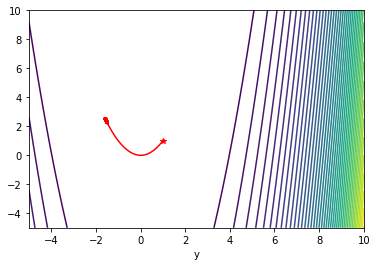

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(( -5, 10))
ax.set_ylim((-5, 10))
ax.set_xlabel("x")
ax.set_xlabel("y")
ax.contour(X,Y,Z, levels = 50)
ax.plot(1,1,"r*")
plot, = ax.plot([], [], color='red')

def init():
    plot.set_data([],[])
    return (plot,)

def animate(i):
    x_points = [i[0] for i in hist3d_ros][0:i*100]
    y_points = [i[1] for i in hist3d_ros][0:i*100]
    plot.set_data(x_points, y_points)
    return (plot,)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int(len(hist3d_ros)/100), interval=50, blit=True)

HTML(anim.to_html5_video())

#### Rosenbrock en 4 dimensiones:  
El proceso para optimizar funciones se puede generalizar para funciónes de n variables de entrada, el proceso matemático no cambia en lo absoluto:

In [ ]:
x_init = np.array([
    round(random.random()+5, 2),
    round(random.random()+5, 2),
    round(random.random()+5, 2)
    ]) # Generamos un X inicial aleatorio con 3 variables.
hist3d_ros, x_min = gradient_descent(grad_rosenbrock, x_init, 0.0000001, 50000) # Minimizamos la función
print('X inicial:', x_init)
print('X óptimo:', x_min)
print('iteraciónes: ', len(hist3d_ros)-1)

X inicial: [5.75 5.85 5.66]
X óptimo: [1. 1. 1.]
iteraciónes:  50000


No podemos graficar una función de 4 dimensiones, pero sí podemos graficar los valores que va tomando X mientras avanza el algoritmo de gradiente por descenso.

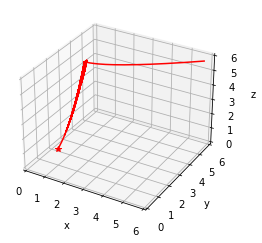

In [ ]:
ncols = 150
nrows = 150
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim((0, 6))
ax.set_ylim((0, 6))
ax.set_zlim((0, 6))
ax.plot(1,1,1, "r*")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plot, = ax.plot([], [], color='red')

def init():
    plot.set_data([],[])
    return (plot,)

def animate(i):
    x_points = [i[0] for i in hist3d_ros][0:i*100]
    y_points = [i[1] for i in hist3d_ros][0:i*100]
    z_points = [i[2] for i in hist3d_ros][0:i*100]
    plot.set_data(x_points, y_points)
    plot.set_3d_properties(z_points)
    return (plot,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int(len(hist3d_ros)/100), interval=50, blit=True)
HTML(anim.to_html5_video())

#### Three hump camel en 2 dimensiones:

Como ya se había mencionado anteriormente, la función three hump camel solo está definida para 3 dimensiones (dos variables de entrada), por cuestiones de tiempo disponible, mostraremos aquí una optimización para la función en 2 y 3 dimensiones solamente.  
Primero veamos la función en 2 dimensiones:  

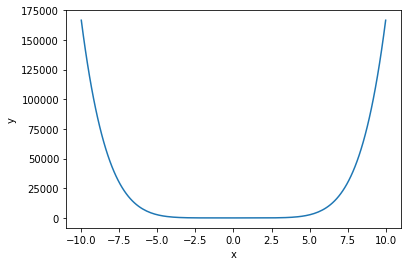

In [ ]:
ncols = 150
nrows = 150
X = np.linspace(-10, 10, ncols)
Y = [three_hump_camel((i, 0)) for i in X]
fig, ax = plt.subplots()
ax.plot(X, Y)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

Podemos observar que su minimo local se encuentra en el punto x=0

In [ ]:
x_init = round(random.random()*5+2, 2) # generamos un x inicial aleatorio.
hist2d_camel, x_optimo = gradient_descent(lambda x: grad_three_hump_camel((x, 0))[0], x_init, 0.0001, 10000) # Minimizamos la función.
print("x inicial:", x_init)
print("x óptimo:", x_optimo)
print("iteraciones:", len(hist2d_camel)-1)

x inicial: 2.17
x óptimo: 1.6553889040917642
iteraciones: 3291


AL estar ubicado en una zona mas llana, hay un error más grande a la hora de encontrar el minimo local.

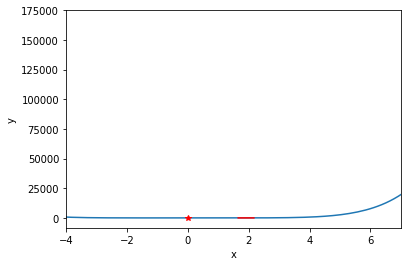

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(( -4, 7))
ax.plot(X,Y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.plot(0,0,"r*")
plot, = ax.plot([], [], color='red')

def init():
    plot.set_data([],[])
    return (plot,)

def animate(i):
    arr_points = np.array(hist2d_camel[0:i*2])
    plot.set_data(arr_points, [three_hump_camel((i, 0)) for i in arr_points])
    return (plot,)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=150, blit=True)

HTML(anim.to_html5_video())

#### Three Hump Camel en 3 dimensiones

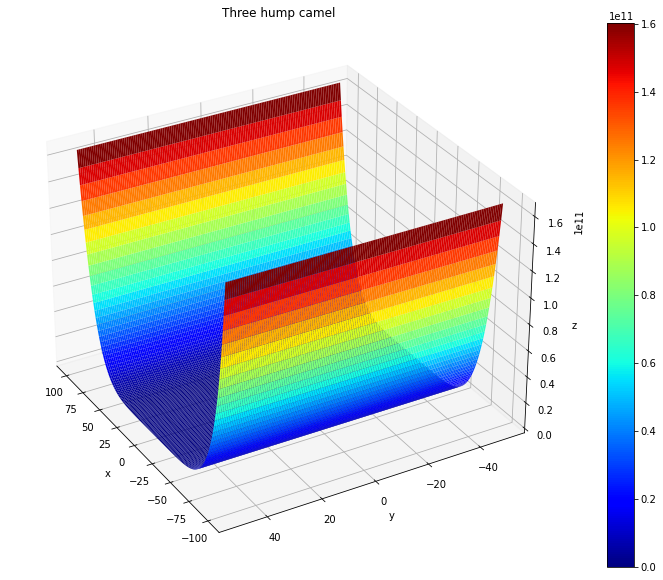

In [ ]:
x = np.linspace(-100, 100, 150)
y = np.linspace(-50, 50, 150)
X, Y = np.meshgrid(x, y)
Z = three_hump_camel((X, Y))
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')
ax.set_title('Three hump camel')
ax.view_init(elev=30., azim=150.)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
s = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')
fig.colorbar(s)
plt.show()

In [ ]:
x_init = np.array([
    round(random.random()*5+5, 2),
    round(random.random()*5+5, 2)
    ])
hist3d_camel, x_min = gradient_descent(grad_three_hump_camel, x_init, 0.0001, 1000000)
print('X inicial:', x_init)
print('X óptimo:', x_min)
print('iteraciónes: ', len(hist3d_camel)-1)

X inicial: [5.06 5.72]
X óptimo: [-2.41315549e-11  5.82587270e-11]
iteraciónes:  15716


Veamos el camino tomado por el algoritmo:

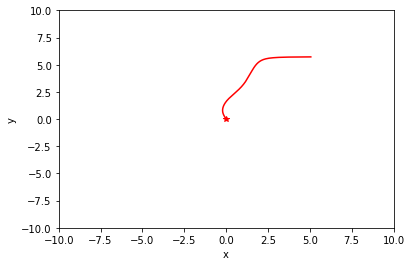

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(( -10, 10))
ax.set_ylim((-10, 10))
ax.contour(X,Y,Z, levels = 50)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.plot(0,0, "r*")
plot, = ax.plot([], [], color='red')

def init():
    plot.set_data([],[])
    return (plot,)

def animate(i):
    x_points = [i[0] for i in hist3d_camel][0:i*100]
    y_points = [i[1] for i in hist3d_camel][0:i*100]
    plot.set_data(x_points, y_points)
    return (plot,)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int(len(hist3d_camel)/100), interval=50, blit=True)
HTML(anim.to_html5_video())

## Conclusión:
La implementación del algoritmo de Gradiente Descendente en dos y tres dimensiones es una herramienta útil para encontrar el mínimo de una función en un campo amplio de aplicaciones. La tasa de aprendizaje y los criterios de parada deben ser ajustados para cada caso específico. En nuestro particular identificamos que las dos funciones a evaluar eran funciones cóncavas, esto dificulta la convergencia del algoritmo ya que cada iteración facilmente podría significar pasarnos del minimo local y caer en un punto donde el gradiente fuera más grande que en la iteración anterior, esto implica la divergencia del algortimo, para evitart esto definimos un alfa muy pequeño, de esta manera el algortimo se movia en pequeñas cantidades cada iteración, la principal desventaja de esta solución fuéla lentitud de la convergencia para el algoritmo.